<a href="https://colab.research.google.com/github/Rami-RK/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Google Colab Implementation


### A. Getting Data from Kaggle onto Google Colab 

In [ ]:
!pip install kaggle

* First, grab your token from Kaggle account page.
* Then scroll down to API and hit “Create New API Token.”
* That’s going to download a file called kaggle.json. Make sure you know where this file is! Maybe put it somewhere you can find it.
* Upload it on the colab  by clicking upload link.
* Copy its path and use below:

In [ ]:
!mkdir ~/.kaggle  ## Making a folder on root directory. This is the way of making root directory

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/kaggle.json  ~/.kaggle/kaggle.json

# !cp  /colab path of kaggle.jon file copied   ~/root path
# Copying this kaggle.json file from current directory to root directory ~/.kaggle
# kaggle search for authentication and require this file to be in root directory like this.

In [ ]:
!ls ~/.kaggle ## Checking content of root directory ,  list working directory contents

kaggle.json


In [ ]:
!pwd # print working directory

/content


In [ ]:
# To delete a folder which has multiple folders, use:
# %rm -rf ~/.kaggle

# Not requird here, If you run this you have to again run above two cell.

### Setting kaggle download path:
* Provide the path where you want to save the downloaded file from kaggle

In [ ]:
!mkdir kaggle  # Making directory  You will see a directory with this name
# In this directory we want to save our data

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
!ls   #  check you can see a new folder kaggle added in the list

drive  kaggle  kaggle.json  sample_data


In [ ]:
!kaggle config set -n path -v /content/kaggle 

- path is now set to: /content/kaggle


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# To access a list of Kaggle datasets.
!kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
unanimad/us-election-2020                                 US Election 2020                             416KB  2020-11-08 00:14:42            613  
manchunhui/us-election-2020-tweets                        US Election 2020 Tweets                      276MB  2020-11-07 12:06:54            708  
headsortails/us-election-2020-presidential-debates        US Election 2020 - Presidential Debates      199MB  2020-10-23 16:56:10            231  
radustoicescu/2020-united-states-presidential-election    2020 United States presidential election      11MB  2019-07-04 15:00:45            560  
etsc9287/2020-general-election-polls                      2020 General Election Polls                  109KB  2020-02-

In [ ]:
## If you’re looking for a specific dataset, you can run syntax below
!kaggle datasets list -s sentiment


ref                                                      title                                             size  lastUpdated          downloadCount  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
crowdflower/twitter-airline-sentiment                    Twitter US Airline Sentiment                       3MB  2019-10-16 00:04:05          46065  
harriken/emoji-sentiment                                 Emoji sentiment                                   12MB  2017-10-01 09:56:54           2577  
kazanova/sentiment140                                    Sentiment140 dataset with 1.6 million tweets      81MB  2017-09-13 22:43:19          41482  
yash612/stockmarket-sentiment-dataset                    Stock-Market Sentiment Dataset                   201KB  2020-06-05 19:16:19           1555  
bittlingmayer/amazonreviews                              Amazon Reviews for Sentiment Analysis      

#### Go to Kaggle, find the dataset you want, and on that page, click the API button (it will copy the code automatically).



In [ ]:
!kaggle datasets download -d kazanova/sentiment140

sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


### B. Downloading Glove for Embedding Matrix

In [ ]:
!kaggle datasets download -d danielwillgeorge/glove6b100dtxt

glove6b100dtxt.zip: Skipping, found more recently modified local copy (use --force to force download)


#### Unzipping the file

In [ ]:
import zipfile

In [ ]:
## Unzipping data
local_zip = '/content/kaggle/datasets/kazanova/sentiment140/sentiment140.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/kaggle/datasets/kazanova/sentiment140')
zip_ref.close()


In [ ]:
## Unzipping Glove 
local_zip='/content/kaggle/datasets/danielwillgeorge/glove6b100dtxt/glove6b100dtxt.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/kaggle/datasets/danielwillgeorge/glove6b100dtxt')
zip_ref.close()


### C. Data Prepocessing & Cleaning 
* Reading the unzipped file and working on it.
* Importing all necessary library required

In [ ]:
import pandas as pd
import nltk

In [ ]:
df=pd.read_csv('/content/kaggle/datasets/kazanova/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df[0].value_counts()

4    800000
0    800000
Name: 0, dtype: int64

In [ ]:
df.drop([1,2,3,4],axis=1,inplace=True)

In [ ]:
df.rename({0:'Labels',5:'Tweets'},axis=1,inplace=True)

In [ ]:
df['Labels']=df['Labels'].replace(4,1)

In [ ]:
df.tail()

,Labels,Tweets
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...


### Preprocessing 
* Working with dataframe is a slow process converting data into numpy array and working with it.

In [ ]:
import numpy as np

In [ ]:
x=df.Tweets.values
y=df.Labels.values
# we have to preprocess the feature i.e. tweets

In [ ]:
x[:5] # Checking first 5 entries

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       'my whole body feels itchy and like its on fire ',
       "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "],
      dtype=object)

### 1.Replacing emoticons with equivalent text

In [ ]:
## Replacing emoticons with words
!pip install emot
#Importing libraries
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [ ]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', " ", text)
    return text

In [ ]:
# Example
convert_emoticons("Finally I finished my work :)")

'Finally I finished my work  '

### 2. Removing tags
* Not required  in this data set

In [ ]:
def remove_tag(text):
  return re.sub('<[^<]+?>','', text)

In [ ]:
remove_tag("""<head><body> hello world! </body></head>""")

' hello world! '

### 3. Removing URLS

In [ ]:

def remove_urls(text):
  rgx=re.compile(r"((http://)[^ ]*|(http)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)")
  text=rgx.sub(' ',text)
  return text



In [ ]:
remove_urls('visit www.yahoo.com http:// http')

'visit     '

### 4. Removing single alphabet,double alphabet and alphanumeric character.

In [ ]:
def remove_apha_numeric(text):
  rgx= re.compile(r'\d+\w+|\w+\d+|\d+|\s\w\w\s|\s\w\s')
  text=rgx.sub(' ',text)
  return text

In [ ]:
remove_apha_numeric("@switchfoot http://twitpic.com/2y1zl - Awww, 10 that's a bummer. a You shoulda got 10m David Carr of df4 Third Day to do it. ;D")

"@switchfoot http://twitpic.com/  - Awww, that's bummer. You shoulda got   David Carr   Third Day do it. ;D"

#### 5. Removing user names



In [ ]:
def remove_user_name(text):
  rgx=re.compile(r'[@]\w+')
  text=rgx.sub(' ',text)
  return text

In [ ]:
remove_user_name('@Jaggan who are you')

'  who are you'

### 6. Removing Multiple repetetions and keeping only two for alphabets
* Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

In [ ]:
def repeat2only(text):
  rgx_pattern = r"(.)\1\1+"
  rgx_replace = r"\1\1"
  text=re.sub(rgx_pattern,rgx_replace,text)
  return text


In [ ]:
repeat2only('Hellooooo')

'Helloo'

### 7. Removing Punctuations

In [ ]:
from string import punctuation
def strip_punctuation(text):
  text=[char for char in text if char not in punctuation]
  return ''.join(text)

In [ ]:
text = "Hello!? how are you doing?"
strip_punctuation(text)

'Hello how are you doing'

### 8. Lemmatize
Lemmatization does morphological analysis of the words.Lemmatize the text so as to get its root form eg: functions,funtionality as function.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer #is based on The Porter Stemming Algorithm

In [ ]:
def lemmatizer(text):
  wordnet_lemmatizer = WordNetLemmatizer()
  word_list = text.split()
  lemmatized_list = [wordnet_lemmatizer.lemmatize(word) for word in word_list]
  return ' '.join (lemmatized_list)

In [ ]:
 lemmatizer('i watches of this fan is great')

'i watch of this fan is great'

### 9. Spell Correction 
* Not implemented here, Too slow, Takes too much time

In [ ]:
!pip install autocorrect

In [ ]:
from autocorrect import Speller
def spell_correct(text):
  spell = Speller(lang='en')
  return spell(text)

In [ ]:
text = "I'm not sleapy and tehre is no place I'm giong to."
spell_correct(text)

"I'm not sleepy and there is no place I'm going to."

#### Trying othter **one**

In [ ]:
!pip install pyspellchecker


In [ ]:
from spellchecker import SpellChecker
text = "I havv goood speling !"
spell = SpellChecker()
([spell.correction(word) for word in text.split()])

['I', 'have', 'good', 'spelling', '!']

In [ ]:
## Making function for spelling correction
def spell_correct(text_array):
  sen_list=[]
  for sen in text_array:
    text=sen.split()
    text = [spell.correction(word) for word  in text ] 
    sen_list.append(' '.join(text))
  return np.array(sen_list)

 #### 10. Removing stopwords


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords[:6] ## Displayiing first few storpwords

['i', 'me', 'my', 'myself', 'we', 'our']

In [ ]:
## Making function for removing stopwords
def remove_stop_words(text_array):
  sen_list=[]
  for sen in text_array:
    text=sen.split()
    text = [i for i in text if not i in stopwords] 
    sen_list.append(' '.join(text))
  return np.array(sen_list)
 

### Making a combined function for all above

In [ ]:
def preprocess(x):
  value=x.copy()
  value = [tweet.lower() for tweet in value] # Conveting into lower case.
  value = [convert_emoticons(i) for  i in (value)]   # Tried but not useful for improving the accuray takes 9 minutes to complete
  value = [remove_urls(i) for  i in (value)]
  value = [remove_user_name(i) for  i in (value)]
  value = [strip_punctuation(i) for  i in (value)]
  value = [remove_tag(i) for  i in (value)]
  value = [repeat2only(i) for  i in (value)]
  value = [ lemmatizer(i) for  i in (value)]  #1 minutes
  value = remove_stop_words(value)
  value = [remove_apha_numeric(i) for  i in (value)]
  return value

In [ ]:
import time
t = time.time()
x_clean= preprocess(x) # It may take time
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round((time.time()-t)/60,2)}, Minutes')

Text Preprocessing complete.
Time Taken: 7.07, Minutes


In [ ]:
x_clean[:10]

[' zl aww thats bummer shoulda got david carr third day',
 'upset cant update facebook texting might cry result school today also blah',
 'dived many time ball managed save rest bound',
 'whole body feel itchy like fire',
 'behaving mad cant see',
 'whole crew',
 'need hug',
 'hey long time see yes rain bit bit lol fine thanks hows',
 'nope didnt',
 'que muera']

In [ ]:
x[:10] ## Comapre with initial daa

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       'my whole body feels itchy and like its on fire ',
       "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
       '@Kwesidei not the whole crew ', 'Need a hug ',
       "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
       "@Tatiana_K nope they didn't have it ",
       '@twittera que me muera ? '], dtype=object)

## D. A little bit of data exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from collections import Counter

In [ ]:
word_list= [sen.split() for sen in x_clean]

In [ ]:
## Counting total unique words in the vocabulary
word_list_with_repetation=Counter([word  for list1 in word_list for word in list1])
unique_word_count=len(list(word_list_with_repetation.keys()))
unique_word_count

417082

In [ ]:
len(set(word_list_with_repetation.keys()))

417082

In [ ]:
positive_list=word_list[80000:]
negative_list=word_list[:80000]

In [ ]:
top_pos=Counter([word  for list1 in positive_list for word in list1])
top_pos_df=pd.DataFrame(top_pos.most_common(100),columns=['Words','Counts'])

top_neg=Counter([word  for list1 in negative_list for word in list1])
top_neg_df=pd.DataFrame(top_neg.most_common(100),columns=['Words','Counts'])

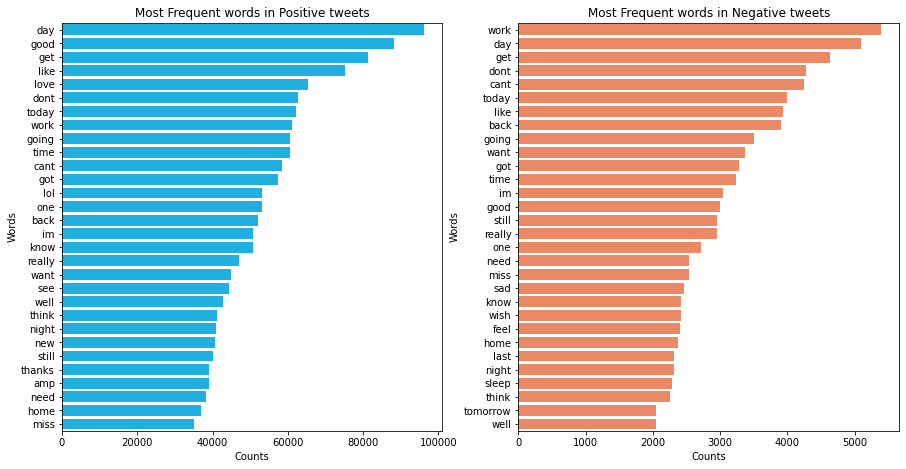

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
sns.barplot(y='Words',x='Counts',data=top_pos_df[:30],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_neg_df[:30],color='coral',ax=ax[1])
ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")
plt.show()


### Sentences having different number of word in each positive and negative group

In [ ]:
positive_list=word_list[80000:]
negative_list=word_list[:80000]


In [ ]:
word_count_positive=[len(list) for list in positive_list]
word_count_negative=[len(list) for list in negative_list]

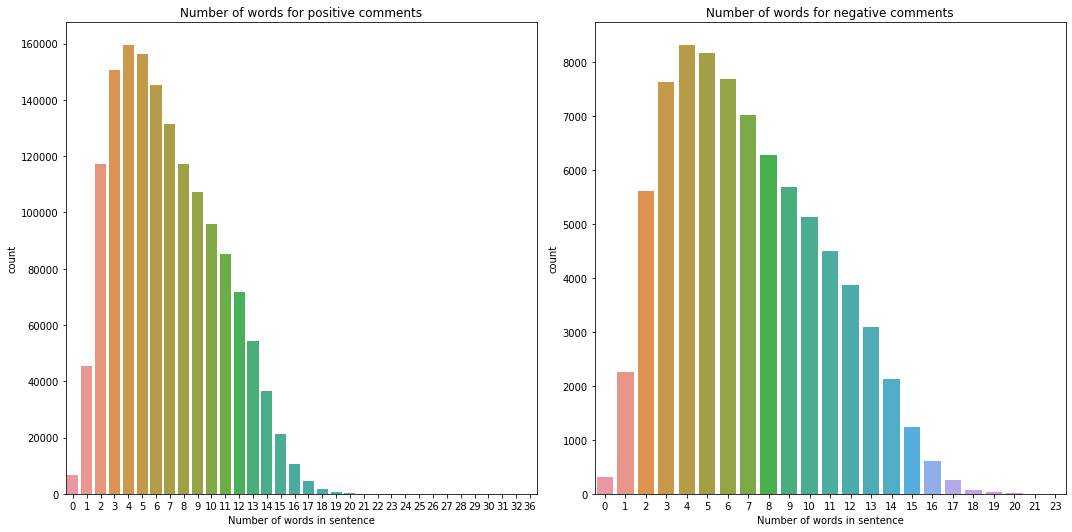

In [ ]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))

sns.countplot(x=word_count_positive,ax=ax[0])
sns.countplot(x=word_count_negative,ax=ax[1])
ax[0].set_title('Number of words for positive comments')
ax[0].set_xlabel('Number of words in sentence')
ax[1].set_title('Number of words for negative comments')
ax[1].set_xlabel('Number of words in sentence')
plt.tight_layout()
plt.show()

### Word-Cloud for Negative tweets

In [ ]:
from wordcloud import WordCloud

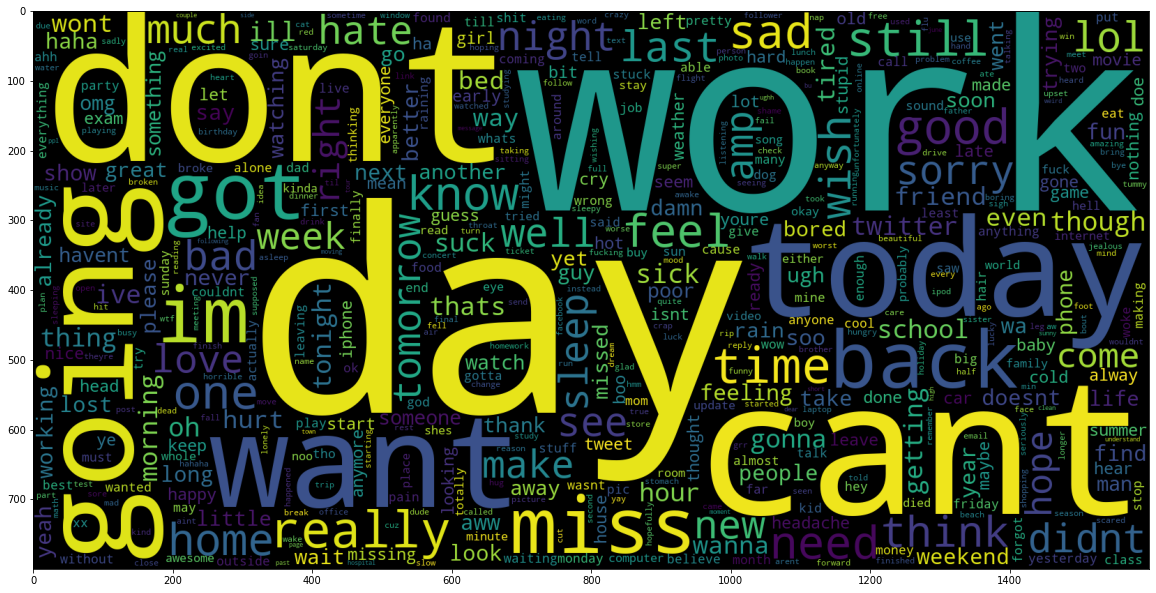

In [ ]:
data_neg = x_clean[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Word-Cloud for Positiveve tweets

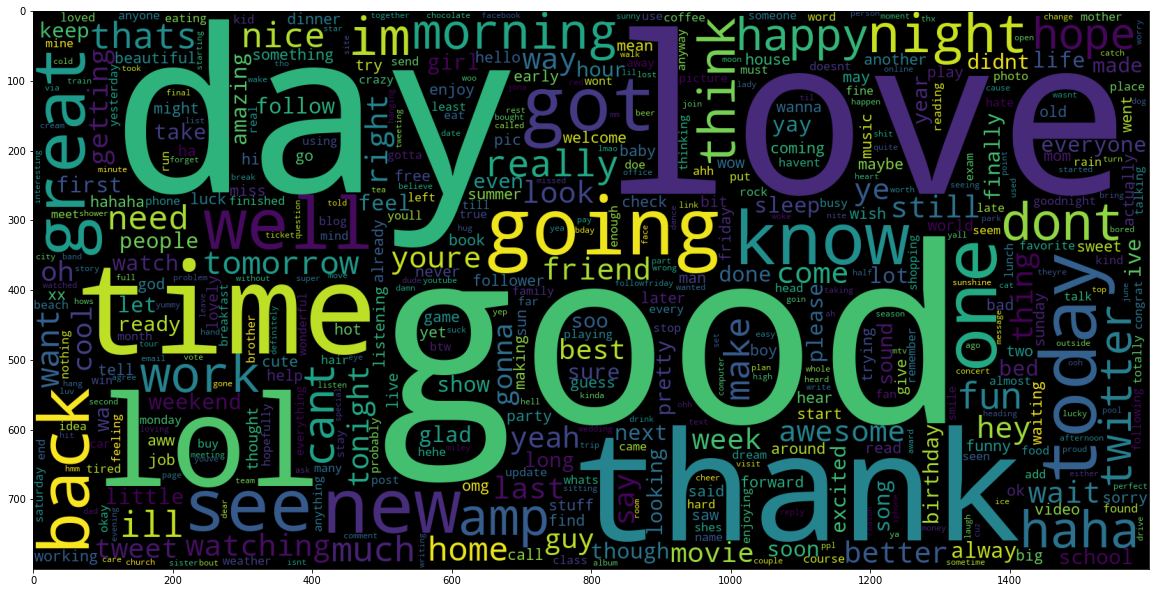

In [ ]:
data_neg = x_clean[800000:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## E. Modelling Using DNN Tensorflow

### Note: tokenizer in tensorflow, by default carry out lower case operation and removal of punctuation as well.

In [ ]:
len(x_clean)

1600000

In [ ]:
x_clean[:5]

[' zl aww thats bummer shoulda got david carr third day',
 'upset cant update facebook texting might cry result school today also blah',
 'dived many time ball managed save rest bound',
 'whole body feel itchy like fire',
 'behaving mad cant see']

## Modelling


In [ ]:

import tensorflow as tf
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [ ]:
embedding_dim = 100
max_length = 16
training_size=160000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
test_portion=.1

## Tokenization, Padding & Train_Test_Split 

In [ ]:
corpus1=(np.vstack([np.array(x_clean),y]).T)


In [ ]:
corpus=corpus1.tolist()

In [ ]:
random.shuffle(corpus)
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(int(corpus[x][1]))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Size of Vocabulary :', vocab_size)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

x_test_pad =np.array(padded[0:split])
y_test = np.array(labels[0:split])
x_train_pad = np.array(padded[split:training_size])
y_train = np.array(labels[split:training_size])



Size of Vocabulary : 83303


In [ ]:
print(len(x_train_pad))
print(len(y_train))
print(len(x_test_pad))
print(len(y_test))

144000
144000
16000
16000


In [ ]:
x_train_pad.shape

(144000, 16)

In [ ]:
y_train.shape

## Making Embedding Matrix from Downloded Glove

In [ ]:
embeddings_index = {};
with open('/content/kaggle/datasets/danielwillgeorge/glove6b100dtxt/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
print(len(embeddings_matrix))

83304


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

history = model.fit(x_train_pad,y_train, epochs=num_epochs,validation_data=(x_test_pad,y_test), verbose=2)

print("Training Complete")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           8330400   
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 8,395,553
Trainable params: 65,153
Non-trainable params: 8,330,400
_________________________________________

<Figure size 432x288 with 0 Axes>

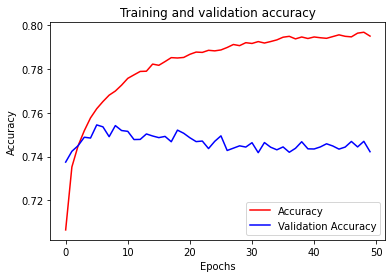

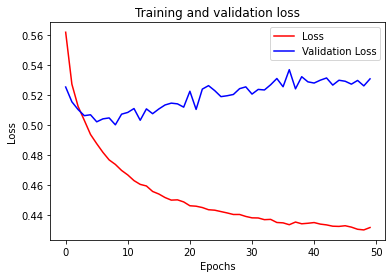

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!

### Prediction Part

In [ ]:
def sentiment_pred(text):
  sequences = tokenizer.texts_to_sequences(np.array([x_test]))
  x_test_pad = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  score = model.predict([x_test_pad])[0,0]
  if score>=0.7:
    print('Positive')
  else:
    print('Negative')


In [ ]:
x_test=" what shit this was a bad movie"
sentiment_pred(x_test)

Negative
